In [1]:
from operators import *
from backtest import *
import pandas as pd
import numpy as np
import os
from typing import Iterable
#import alphalens as als
import quantstats as qs
import matplotlib.pyplot as plt
import pickle
qs.extend_pandas()

target_folder_path = rf'/Users/tedting/Documents/backtest_ted'
%cd "{target_folder_path}"

/Users/tedting/Documents/backtest_ted


/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
exp_returns = pd.read_pickle(rf'{target_folder_path}/data/TW_Target_Dayily_20231006.pkl') # Open~Open.pct_change().shift(-2)
adj_close = pd.read_pickle(rf'{target_folder_path}/data/Adj_close.pkl')
adj_open = pd.read_pickle(rf'{target_folder_path}/data/Adj_open.pkl')

Close = pd.read_pickle(rf'{target_folder_path}/data/Close.pkl')
Volume = pd.read_pickle(rf'{target_folder_path}/data/Volume.pkl')

#sample_open = pd.read_pickle(f'{target_folder_path}/data/sample_open.pkl')

In [3]:
EPS_N = pd.read_pickle(rf'{target_folder_path}/data_20231129_02/EPS_N.pkl')
RevenueGrowthRate_N = pd.read_pickle(rf'{target_folder_path}/data_20231129_02/RevenueGrowthRate_N.pkl')
OperatingProfit_N = pd.read_pickle(rf'{target_folder_path}/data_20231129_02/OperatingProfit_N.pkl')
ROA_C_EBITDA_N = pd.read_pickle(rf'{target_folder_path}/data_20231129_02/ROA_C_EBITDA_N.pkl')
ROE_A_AfterTax_N = pd.read_pickle(rf'{target_folder_path}/data_20231129_02/ROE_A_AfterTax_N.pkl')
NetProfitMargin_AfterTax_N = pd.read_pickle(rf'{target_folder_path}/data_20231129_02/NetProfitMargin_AfterTax_N.pkl')
GrossProfitMargin_N = pd.read_pickle(rf'{target_folder_path}/data_20231129_02/GrossProfitMargin_N.pkl')
GrossOperatingProfit_N = pd.read_pickle(rf'{target_folder_path}/data_20231129_02/GrossOperatingProfit_N.pkl')
GrossProfitGrowthRate_N = pd.read_pickle(rf'{target_folder_path}/data_20231129_02/GrossProfitGrowthRate_N.pkl')
OperatingProfitGrowthRate_N = pd.read_pickle(rf'{target_folder_path}/data_20231129_02/OperatingProfitGrowthRate_N.pkl')

In [4]:
# EPS = pd.read_pickle(f'{target_folder_path}/data/EPS.pkl')
# RevenueGrowthRate = pd.read_pickle(rf'{target_folder_path}\data\RevenueGrowthRate.pkl')
# OperatingProfit = pd.read_pickle(rf'{target_folder_path}\data\OperatingProfit.pkl')
# ROA_C_EBITDA = pd.read_pickle(rf'{target_folder_path}\data\ROA_C_EBITDA.pkl')
# ROE_A_AfterTax = pd.read_pickle(rf'{target_folder_path}\data\ROE_A_AfterTax.pkl')
# NetProfitMargin_AfterTax = pd.read_pickle(rf'{target_folder_path}\data\NetProfitMargin_AfterTax.pkl')
# MarketCap_M = pd.read_pickle(rf'{target_folder_path}\data\MarketCap_M.pkl')
# GrossProfitMargin = pd.read_pickle(rf'{target_folder_path}\data\GrossProfitMargin.pkl')
# GrossOperatingProfit = pd.read_pickle(rf'{target_folder_path}\data\GrossOperatingProfit.pkl')
# GrossProfitGrowthRate = pd.read_pickle(rf'{target_folder_path}\data\GrossProfitGrowthRate.pkl')
# OperatingProfitGrowthRate = pd.read_pickle(rf'{target_folder_path}\data\OperatingProfitGrowthRate.pkl')

In [5]:
# Usually_filter
# Cap50 = Cap.rolling(252).sum().rank(axis = 1,ascending=False) < 50
# Cap100 = Cap.rolling(252).sum().rank(axis = 1,ascending=False) < 100
# Cap500 = Cap.rolling(252).sum().rank(axis = 1,ascending=False) < 500
# TR100 = turnoverrate.rolling(252).sum().rank(axis = 1,ascending=False) < 100
# TR500 = turnoverrate.rolling(252).sum().rank(axis = 1,ascending=False) < 500

# For TMBA_multi
Volume_y_avg = Volume.rolling(252).mean()
Close_y_avg = Close.rolling(252).mean()
Volume_Filter = Volume_y_avg > 200
trade_volume_Filter = Close_y_avg * Volume_y_avg > 60000
small_aum_Filter = Volume_Filter & trade_volume_Filter 

             Sharpe Ratio Annualized Ret Max Drawdown      STD Turnover
Performance      1.434854           5.3%      5.7172%  0.2298%  0.5554%


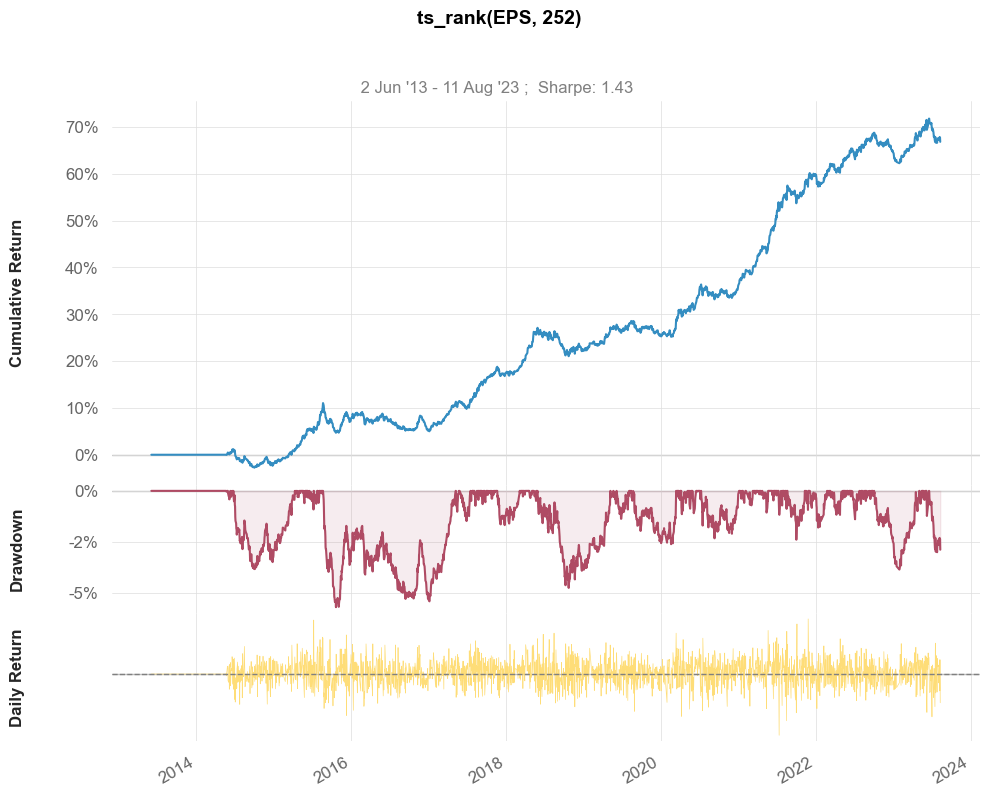

             Sharpe Ratio Annualized Ret Max Drawdown                   STD  \
Performance       0.93074          2.93%      5.1612%  0.19849999999999998%   

            Turnover  
Performance  0.4622%  


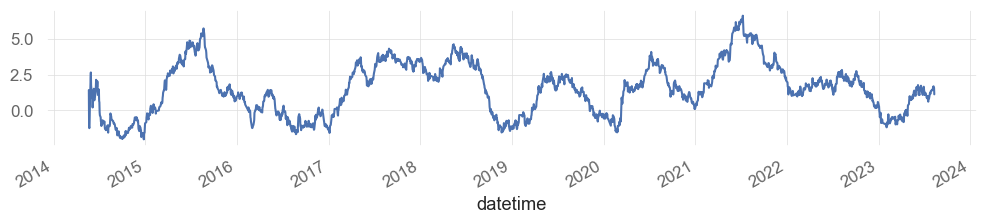

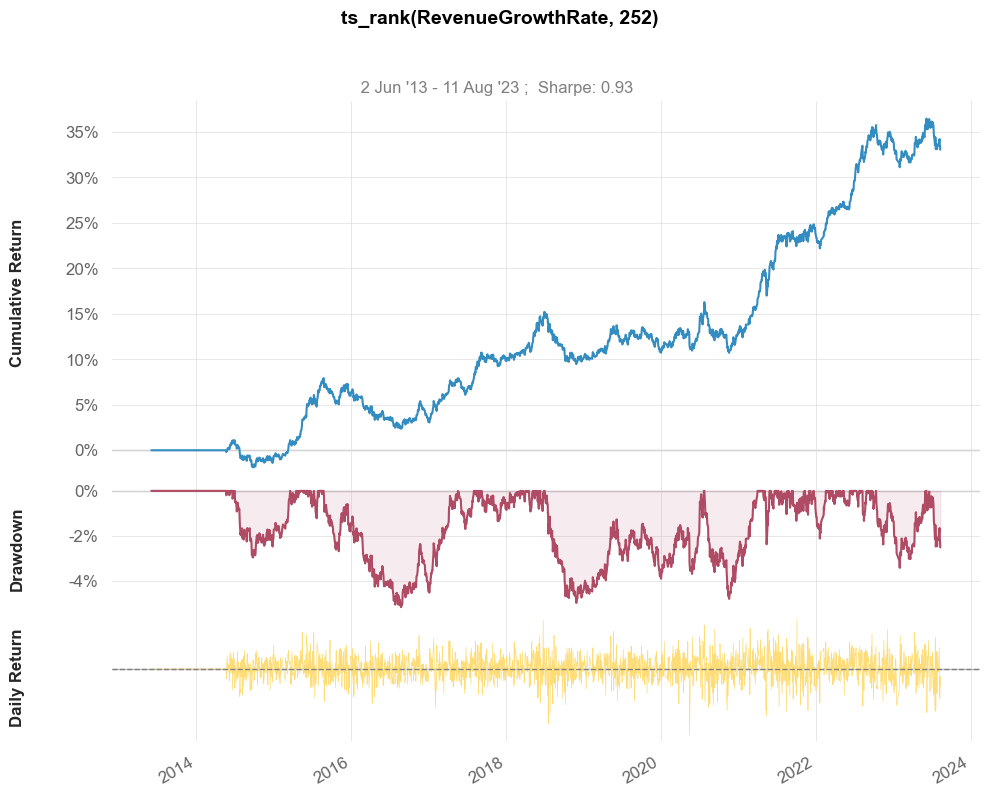

             Sharpe Ratio Annualized Ret        Max Drawdown      STD Turnover
Performance      1.246167          4.55%  6.854100000000001%  0.2284%  0.5217%


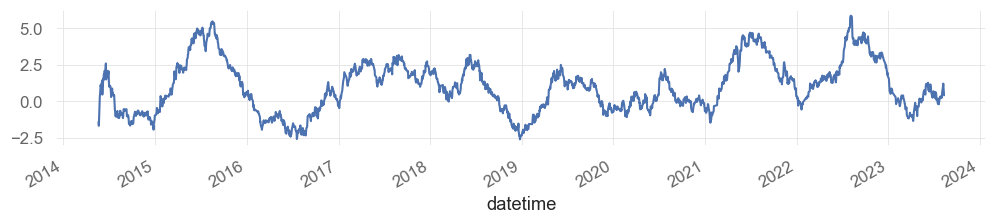

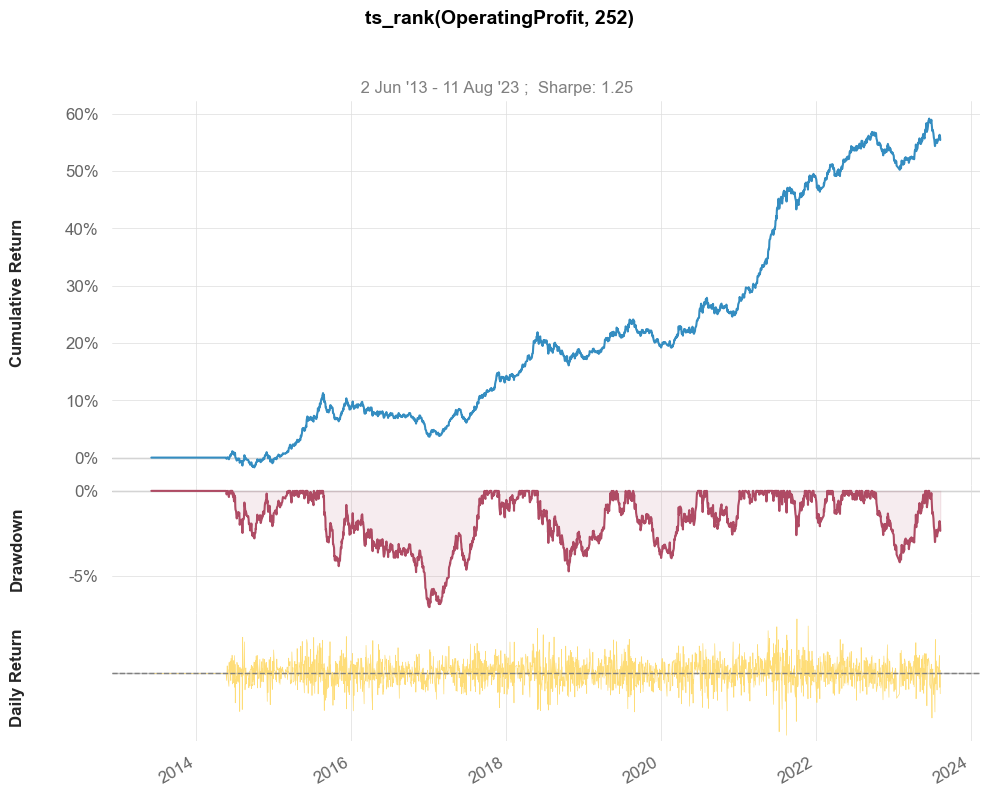

             Sharpe Ratio Annualized Ret Max Drawdown                   STD  \
Performance      1.328902          4.21%      5.8667%  0.19770000000000001%   

                         Turnover  
Performance  0.47759999999999997%  


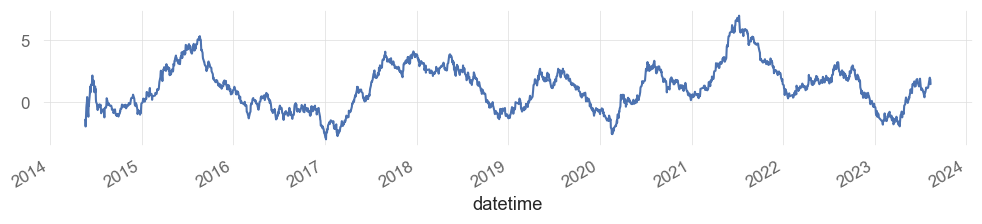

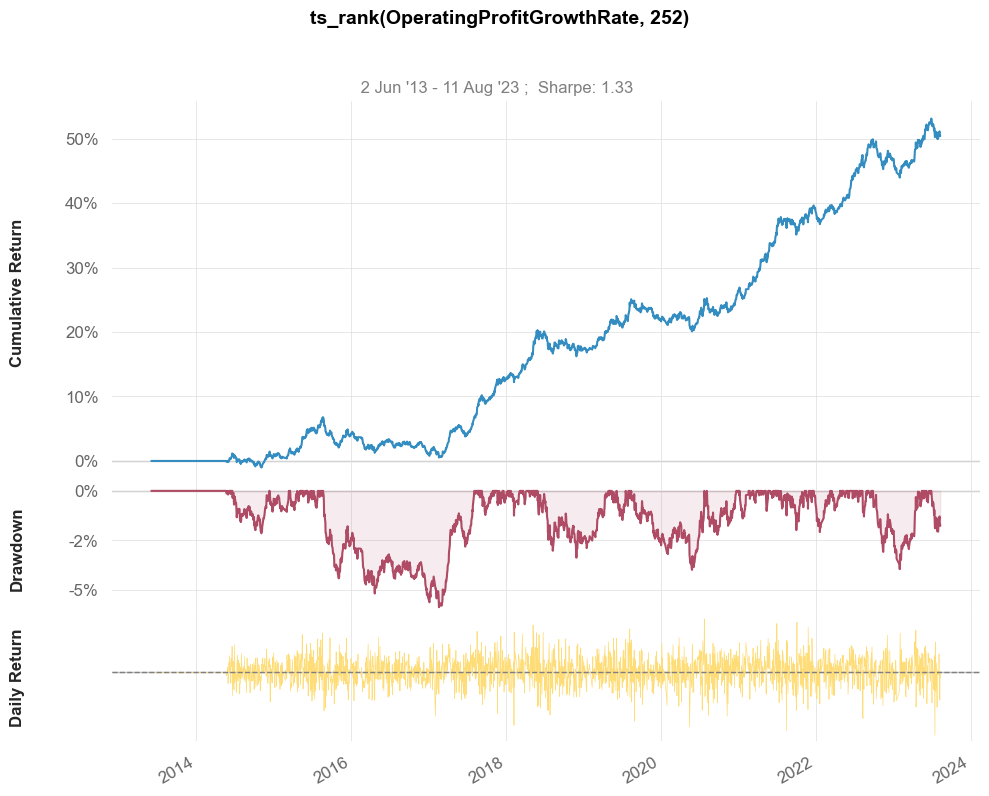

             Sharpe Ratio Annualized Ret        Max Drawdown  \
Performance      1.375931           4.9%  4.974399999999999%   

                              STD Turnover  
Performance  0.22200000000000003%  0.5326%  


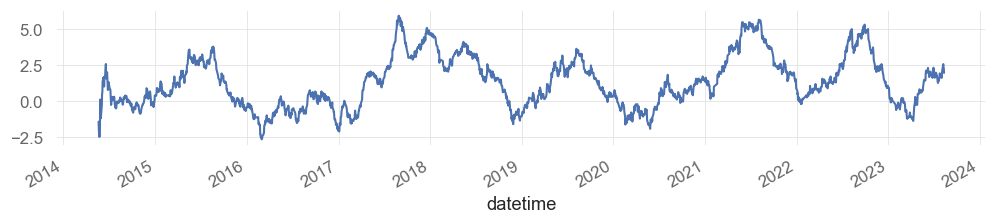

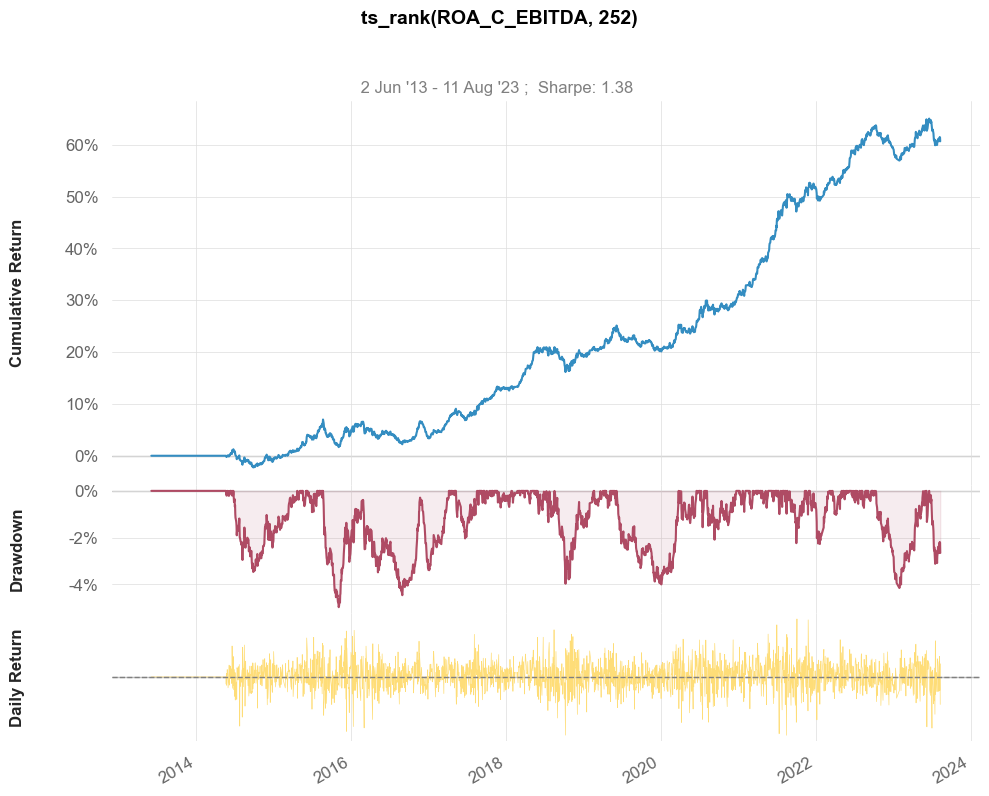

             Sharpe Ratio      Annualized Ret Max Drawdown      STD  \
Performance      1.468275  5.510000000000001%      5.7504%  0.2333%   

                        Turnover  
Performance  0.5650999999999999%  


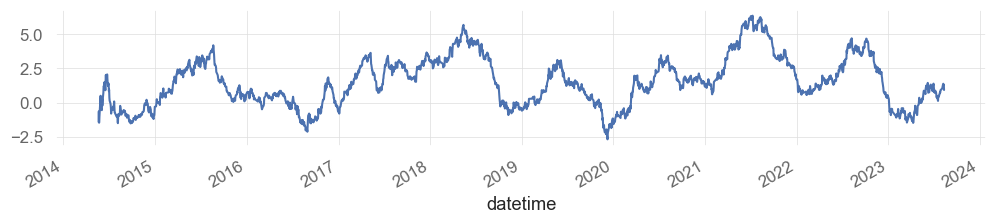

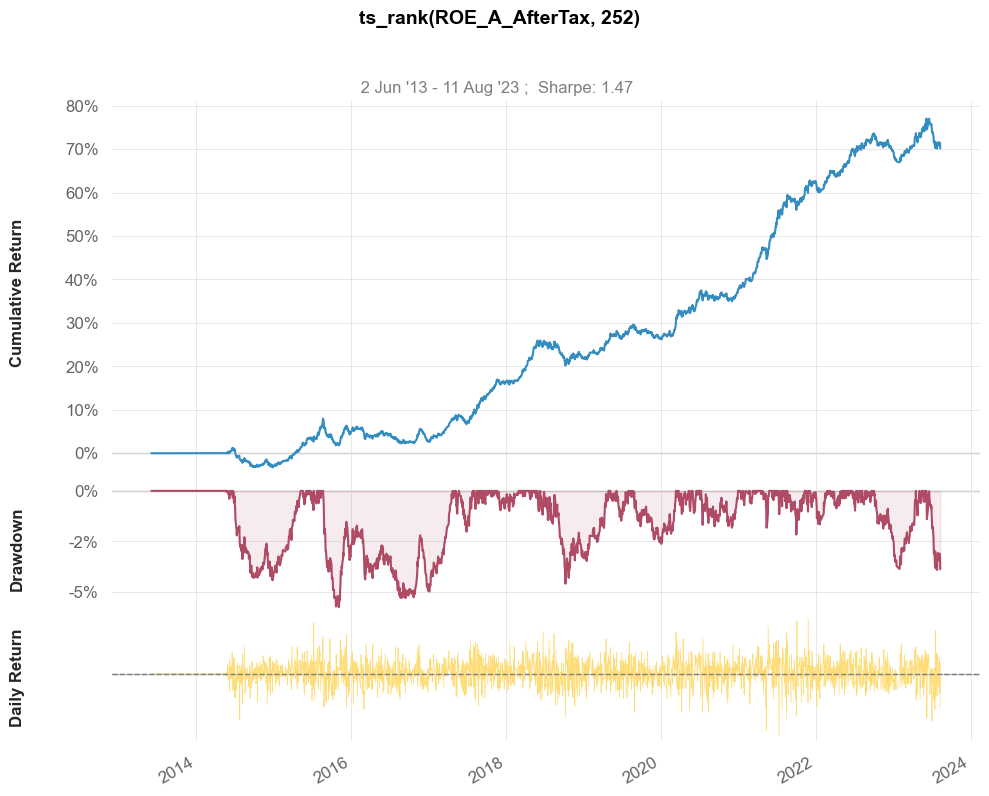

             Sharpe Ratio Annualized Ret Max Drawdown      STD Turnover
Performance      1.413806          5.07%      6.3389%  0.2231%  0.5582%


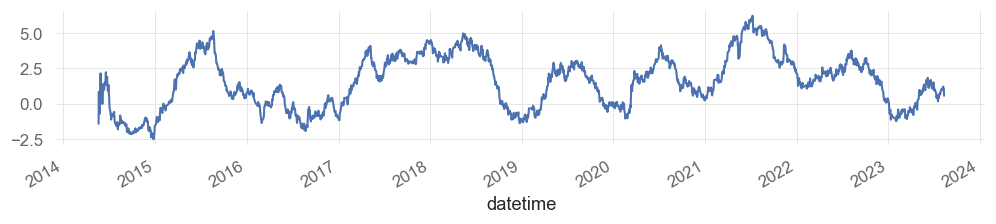

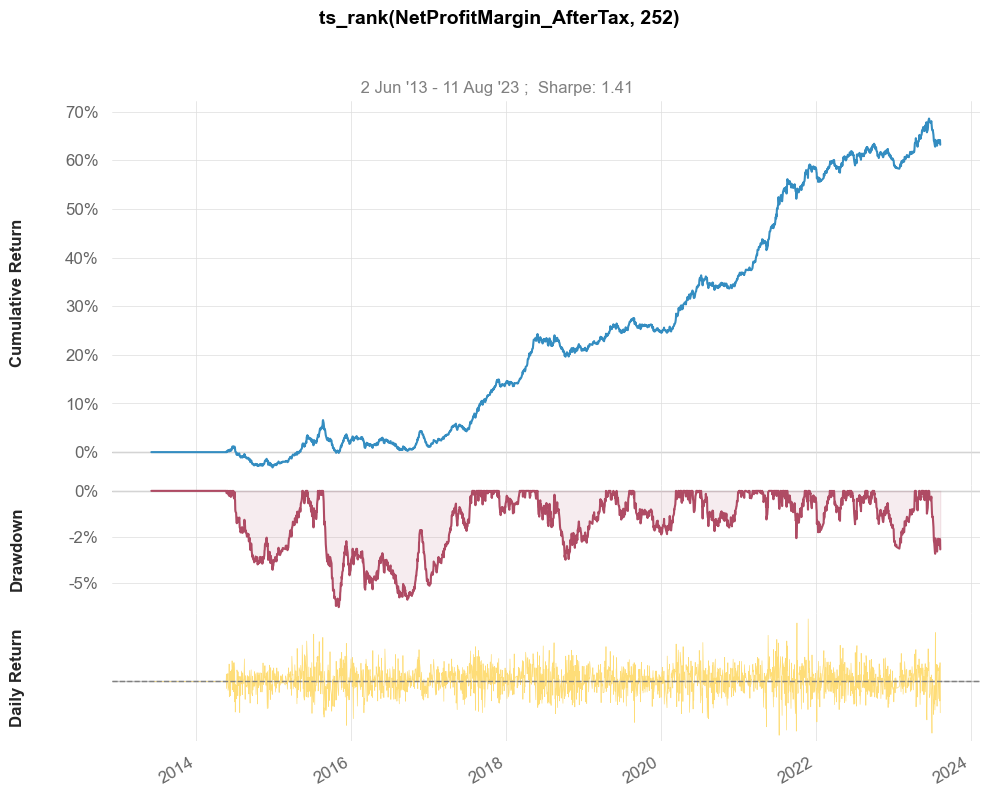

             Sharpe Ratio Annualized Ret        Max Drawdown  \
Performance      1.236242          4.14%  5.056900000000001%   

                              STD Turnover  
Performance  0.20929999999999999%  0.5021%  


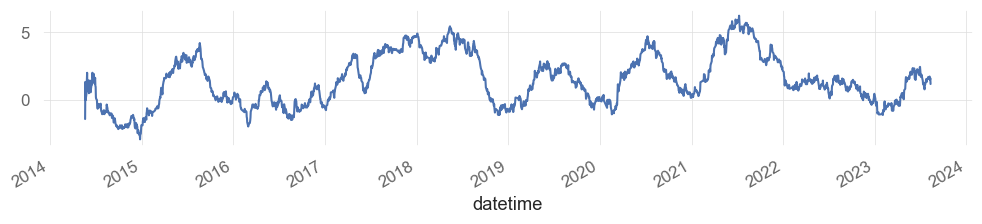

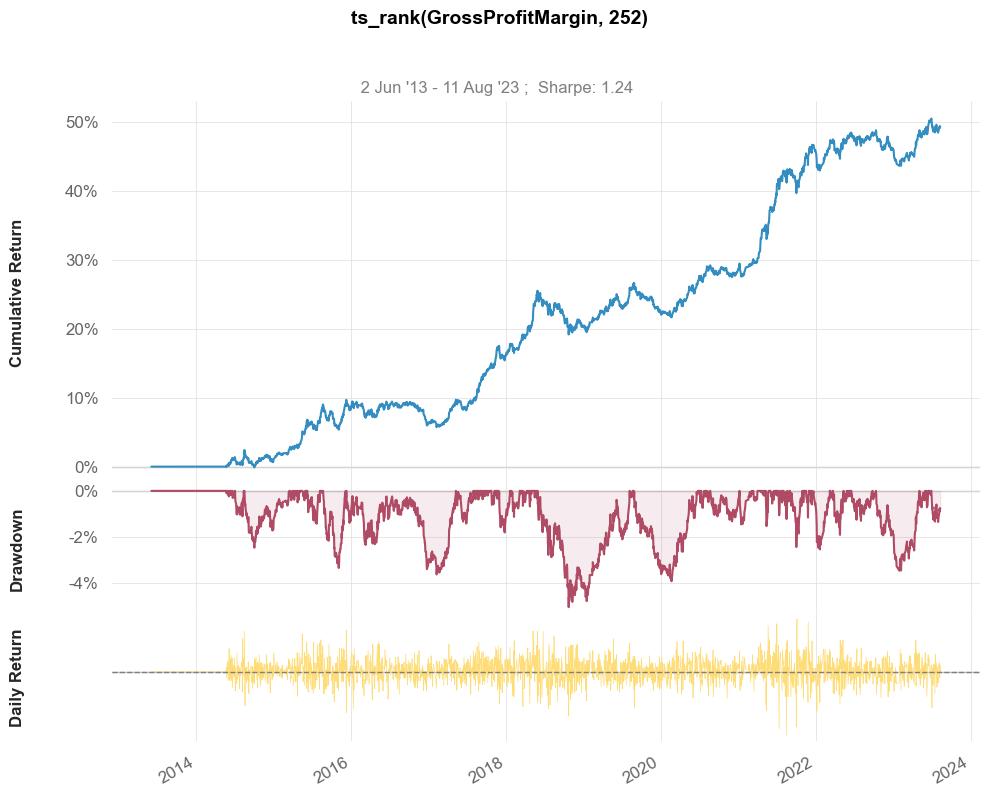

             Sharpe Ratio Annualized Ret         Max Drawdown  \
Performance      1.088411          4.01%  6.6354999999999995%   

                              STD Turnover  
Performance  0.23149999999999998%  0.5124%  


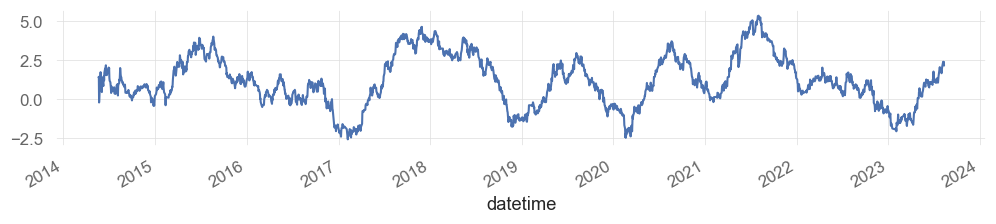

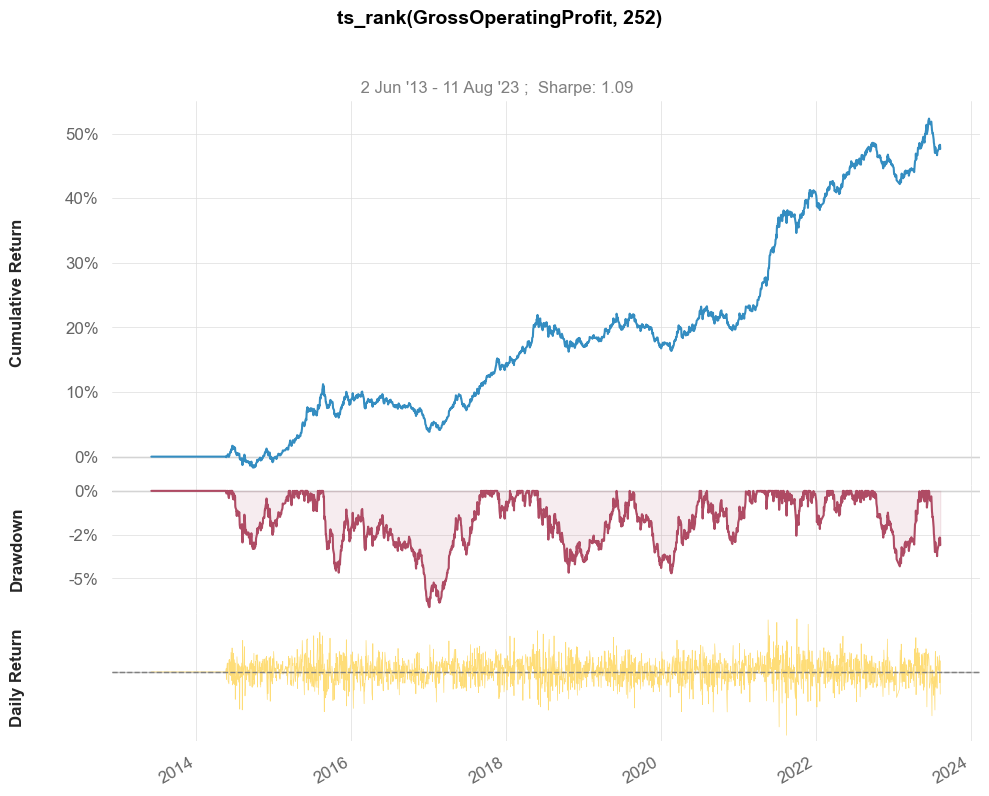

             Sharpe Ratio Annualized Ret Max Drawdown      STD Turnover
Performance      1.325774          4.34%      5.8671%  0.2043%  0.4635%


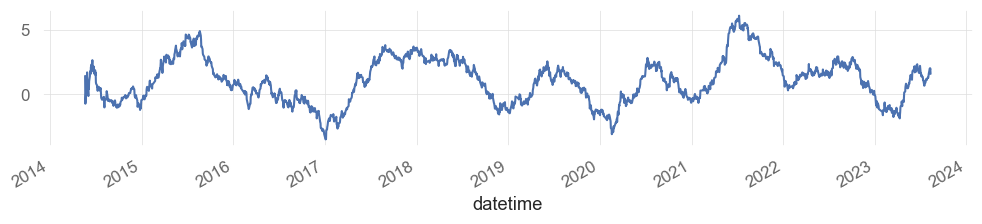

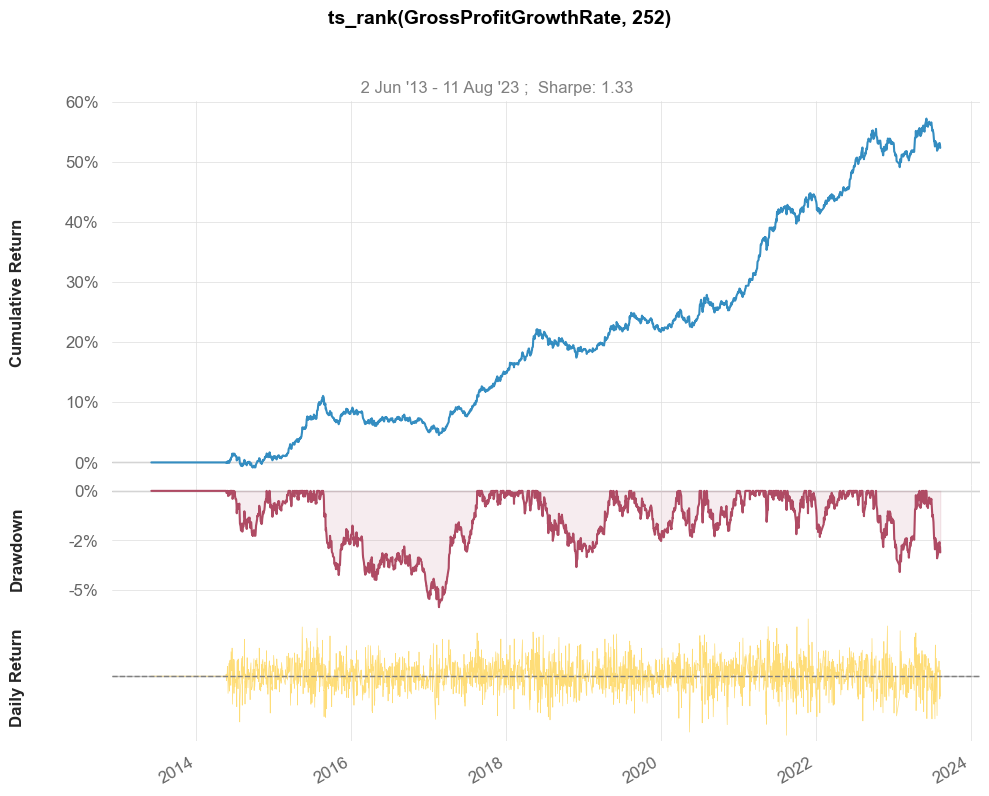

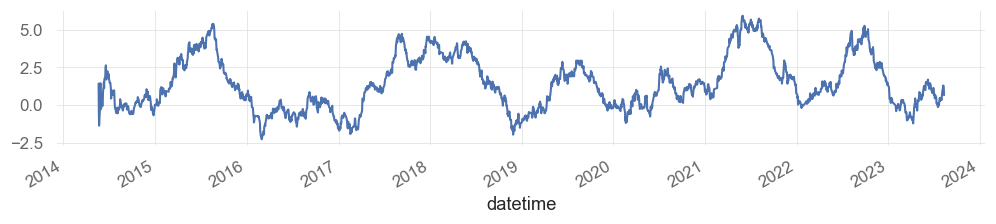

In [18]:
multi_alpha_list = [
    "ts_rank(EPS_N, 252)",
    "ts_rank(RevenueGrowthRate_N, 252)",
    "ts_rank(OperatingProfit_N, 252)",
    "ts_rank(OperatingProfitGrowthRate_N, 252)",
    "ts_rank(ROA_C_EBITDA_N, 252)",
    "ts_rank(ROE_A_AfterTax_N, 252)",
    "ts_rank(NetProfitMargin_AfterTax_N, 252)",
    "ts_rank(GrossProfitMargin_N, 252)",
    "ts_rank(GrossOperatingProfit_N, 252)",
    "ts_rank(GrossProfitGrowthRate_N, 252)"
]

for i in multi_alpha_list:
    alpha = eval(i)[small_aum_Filter]
    LS_result, result_summary = bt(alpha, exp_returns,
                               strategy = 'LO',
                               buy_fee=0.001425*0.3, sell_fee=0.001425*0.3+0.003,
                               start_time='2022-01-01',
                               end_time='2023-12-31')
    print(result_summary)
    qs.plots.snapshot(LS_result, title = i, show=True)
    
    plt.figure(figsize=(12, 2))
    LS_result.rolling_sharpe().plot()

    # result_weight = weight(alpha)
    # pickle_file = os.path.join(rf'{target_folder_path}\result_20231129', f'{i}.pkl')
    # with open(pickle_file, 'wb') as file:
    #     pickle.dump(result_weight, file)  